In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

# WHO - global influenza occurences
The WHO reports Influenza occurences for all around the world on a weekly basis. It is expected that due to spreading patterns of influenza waves throughout the world, influenza waves different countries can be used as an indicator for the prediction of influenza waves for Germany. The data for the **Influenza transmission zone** South West Europe is analysed below 

Note: The influenza transmission zones join geographically related countries or territories to larger areas that have similar influenza transmission patterns so that an overview can be given. www.who.int/csr/.../swineflu/Influenza_Transmission_Zones.pdf


In [2]:
df_who_global = pd.read_csv('FluNetInteractiveReport.csv',skiprows=3,parse_dates=['SDATE','EDATE']).fillna(value = 0)
df_who_global.head(5)


Country               WHOREGION          FLUREGION  Year  Week      SDATE  \
0  Albania  European Region of WHO  South West Europe  2000     1 2000-01-03   
1  Albania  European Region of WHO  South West Europe  2000    26 2000-06-26   
2  Albania  European Region of WHO  South West Europe  2001     4 2001-01-22   
3  Albania  European Region of WHO  South West Europe  2001     8 2001-02-19   
4  Albania  European Region of WHO  South West Europe  2002    11 2002-03-11   

       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  AH1        ...          \
0 2000-01-09               0.0                0.0  0.0        ...           
1 2000-07-02               0.0                0.0  0.0        ...           
2 2001-01-28               0.0                0.0  0.0        ...           
3 2001-02-25               0.0                0.0  2.0        ...           
4 2002-03-17               0.0                0.0  0.0        ...           

   AH5  ANOTSUBTYPED  INF_A  BYAMAGATA  BVICTORIA  BNOTDETERMINED  INF_B  \
0  0.0           0.0      0        0.0        0.0             0.0      0   
1  0.0           0.0      0        0.0        0.0             0.0      0   
2  0.0           0.0      0        0.0        0.0             0.0      0   
3  0.0           0.0      2        0.0        0.0             0.0      0   
4  0.0           0.0      0        0.0        0.0             0.0      0   

   ALL_INF  ALL_INF2              TITLE  
0        0       0.0  Regional Outbreak  
1        0       0.0          No Report  
2        0       0.0           Sporadic  
3        2       0.0           Sporadic  
4        0       0.0        No Activity  

[5 rows x 22 columns]

['Country', 'WHOREGION', 'FLUREGION', 'Year', 'Week', 'SDATE', 'EDATE', 'SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'AH1', 'AH1N12009', 'AH3', 'AH5', 'ANOTSUBTYPED', 'INF_A', 'BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED', 'INF_B', 'ALL_INF', 'ALL_INF2', 'TITLE']


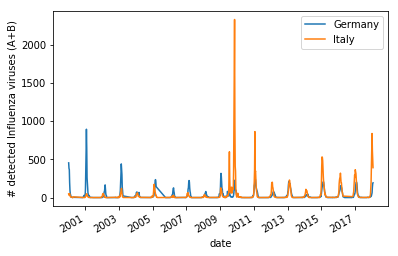

In [3]:
print(list(df_who_global))

df_2years_G_F_I = df_who_global.loc[df_who_global['Country'].isin(['Germany','Italy'])&(df_who_global['SDATE']>='1995-12-01')]

df_2years_G_F_I.set_index('SDATE',inplace=True)
fig = plt.figure()
df_2years_G_F_I.groupby('Country')['ALL_INF'].plot(legend = True)

plt.xlabel('date')
plt.ylabel('# detected Influenza viruses (A+B)')

#plt.savefig('InfluenzaDetectionsOverTime_France_Germany_Italy.eps')


In [4]:
df_inf_per_state=df_who_global.pivot(index='EDATE', columns='Country', values='ALL_INF')
df_inf_per_state.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

print(list(df_inf_per_state))
df_inf_per_state.tail()

['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Croatia', 'France', 'Germany', 'Greece', 'Italy', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Portugal', 'Serbia', 'Slovenia', 'Spain', 'Switzerland', 'The former Yugoslav Republic of Macedonia']


Country     Albania  Austria  Belgium  Bosnia and Herzegovina  Croatia  \
EDATE                                                                    
2018-01-14     16.0    310.0     21.0                     NaN    207.0   
2018-01-21     35.0    482.0      8.0                     NaN    346.0   
2018-01-28     47.0    650.0     31.0                     NaN    201.0   
2018-02-04     82.0    667.0      NaN                     NaN    215.0   
2018-02-11      NaN      NaN      NaN                     NaN      NaN   

Country     France  Germany  Greece  Italy  Luxembourg  Malta  Montenegro  \
EDATE                                                                       
2018-01-14  1652.0     63.0     8.0  840.0        35.0  162.0        10.0   
2018-01-21  1492.0    137.0    37.0  614.0        70.0  104.0        14.0   
2018-01-28  1432.0    184.0    23.0  513.0        95.0   78.0        14.0   
2018-02-04  1207.0    193.0    46.0  392.0        96.0    NaN         NaN   
2018-02-11     NaN      NaN     NaN    NaN         NaN    NaN         NaN   

Country     Netherlands  Portugal  Serbia  Slovenia   Spain  Switzerland  \
EDATE                                                                      
2018-01-14        177.0     338.0    37.0     153.0  1367.0        885.0   
2018-01-21        142.0     361.0    88.0     150.0  1382.0        485.0   
2018-01-28        174.0     305.0   103.0     192.0  1034.0         48.0   
2018-02-04         89.0     272.0   124.0     245.0   744.0        169.0   
2018-02-11          NaN       NaN    72.0       NaN     NaN          NaN   

Country     The former Yugoslav Republic of Macedonia  
EDATE                                                  
2018-01-14                                        6.0  
2018-01-21                                        1.0  
2018-01-28                                        8.0  
2018-02-04                                       13.0  
2018-02-11                                        NaN

## Cross-correlation of influenza cases reported from European countries


In the following, the cross-correlation of the influenza cases reported in Germany and in other European countries is investigated for different time-lags, that may indicate the delay of the flu wave between the countries. 



In [5]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))   #pandas.Series.corr (Pearson correlation coefficient)


timelag=range(-5,10,1)

df_crosscorr=pd.DataFrame(index=timelag)
df_crosscorr_summary=pd.DataFrame(index=['max', 'shift [w]'])

for column in df_inf_per_state:
    xcov_weekly = [crosscorr(df_inf_per_state['Germany'],df_inf_per_state[column], lag=i) for i in timelag]
    df_crosscorr[column] = xcov_weekly
    df_crosscorr_summary[column]=[max(xcov_weekly), timelag[xcov_weekly.index(max(xcov_weekly))]]
 

df_crosscorr_summary.loc[:,['Italy','Austria','UK', 'Switzerland','France', 'Spain', 'Poland', 'Netherlands', 'Sweden']]


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Italy   Austria  UK  Switzerland    France     Spain  Poland  \
max        0.33006  0.429813 NaN     0.334486  0.824238  0.373614     NaN   
shift [w]  1.00000  1.000000 NaN     2.000000  2.000000  3.000000     NaN   

           Netherlands  Sweden  
max           0.424088     NaN  
shift [w]     2.000000     NaN

KeyError: "['UK' 'Poland'] not in index"

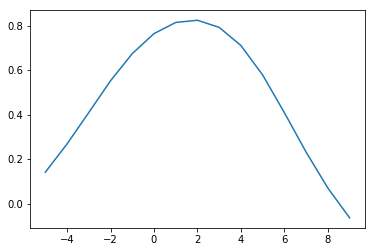

In [6]:
plt.plot(timelag, df_crosscorr['France'])
df_crosscorr.reset_index().plot(x='index', y=['France', 'UK', 'Poland'])
plt.xlabel('time lag [weeks]')
plt.ylabel('crosscorrelation')
plt.legend()
plt.show()


KeyError: u'the label [UK] is not in the [columns]'

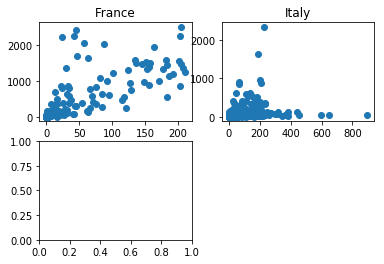

In [7]:
from datetime import timedelta

countries=['France','Italy','UK','Poland']
lag=0
d=datetime.timedelta(weeks=lag)

plt.subplot(221)
plt.scatter(df_inf_per_state.loc[(df_inf_per_state.index.min()+d):,'Germany'], df_inf_per_state.loc[:(df_inf_per_state.index.max()-d),countries[0]])
plt.title(countries[0])

plt.subplot(222)
plt.scatter(df_inf_per_state.loc[(df_inf_per_state.index.min()+d):,'Germany'], df_inf_per_state.loc[:(df_inf_per_state.index.max()-d),countries[1]])
plt.title(countries[1])

plt.subplot(223)
plt.scatter(df_inf_per_state.loc[(df_inf_per_state.index.min()+d):,'Germany'], df_inf_per_state.loc[:(df_inf_per_state.index.max()-d),countries[2]])
plt.title(countries[2])

plt.subplot(224)
plt.scatter(df_inf_per_state.loc[(df_inf_per_state.index.min()+d):,'Germany'], df_inf_per_state.loc[:(df_inf_per_state.index.max()-d),countries[3]])
plt.title(countries[3])


EDATE
2000-01-09    455.0
2000-01-16    383.0
2000-01-23    366.0
2000-01-30    196.0
2000-02-06     97.0
2000-02-13     50.0
2000-02-20     36.0
2000-02-27     24.0
2000-03-05      3.0
2000-03-12      5.0
2000-03-19      4.0
2000-03-26      1.0
2000-04-02      1.0
2000-04-09      3.0
2000-04-16      NaN
2000-04-23      NaN
2000-04-30      NaN
2000-05-07      NaN
2000-05-14      NaN
2000-05-21      NaN
2000-05-28      NaN
2000-06-04      NaN
2000-06-11      NaN
2000-06-18      NaN
2000-06-25      NaN
2000-07-02      NaN
2000-07-09      NaN
2000-07-16      NaN
2000-07-23      NaN
2000-07-30      NaN
              ...  
2017-07-23      0.0
2017-07-30      0.0
2017-08-06      1.0
2017-08-13      0.0
2017-08-20      0.0
2017-08-27      0.0
2017-09-03      0.0
2017-09-10      0.0
2017-09-17      0.0
2017-09-24      0.0
2017-10-01      NaN
2017-10-08      3.0
2017-10-15      5.0
2017-10-22      2.0
2017-10-29      0.0
2017-11-05      2.0
2017-11-12      3.0
2017-11-19      2.0
2017-11-26    

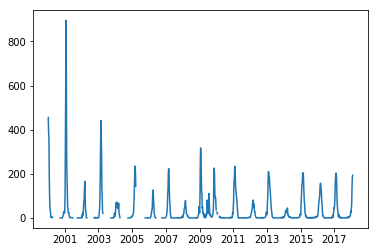

In [8]:
import numpy as np
from scipy import stats

x=df_inf_per_state.index.values
y=df_inf_per_state['Germany'].as_matrix()
not_nan_ind = ~np.isnan(y)
#m, b, r_val, p_val, std_err = stats.linregress(x[not_nan_ind],y[not_nan_ind])
#detrend_y = y - (m*x + b)
plt.plot(x,y)

df_inf_per_state['Germany']

In [88]:
#detrending the data

from scipy import signal

df_inf_per_state_detr=pd.DataFrame()

x=df_inf_per_state.index.values

for column in df_inf_per_state:
    #df_inf_per_state_detr[column] = signal.detrend(df_inf_per_state[column])
    y=df_inf_per_state[column]
    not_nan_ind = ~np.isnan(y)
    m, b, r_val, p_val, std_err = stats.linregress(x[not_nan_ind],y[not_nan_ind])
    detrend_y = y - (m*x + b)


signal.detrend(x)

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

# Google trend data

Google trend data is expected to give a good estimator of the current influenza situation in a country. It's quality for medium and long term are questionable. 

## Comparison Germany Bavaria (Saarland)

The google trend timeseries (keyword Influenza) from Germany and Bavaria (and Saarland) are superimposed to check wether different characteristics regarding initiation time/magnitude etc. can be observed.

In [119]:
# get data through the unofficial Google treds API (pytrends)
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq(hl = 'en-US')

kw_list = ["Influenza"]
timeframe_idx = 'today 5-y' # weekly stats for last 5 years (all givels everyting starting from 2004 but at monthly resolution)
cat_idx_Gesundheit = 45
geo_idx = 'DE'
geo_idxBY = 'DE-BY'
geo_idxSL = 'DE-SL'

pytrends.build_payload(kw_list,cat=cat_idx_Gesundheit,timeframe = timeframe_idx,geo = geo_idx)
pf_googleTrends_Germany = pytrends.interest_over_time()
pf_googleTrends_Germany.rename(columns={'Influenza':'Germany'})

pytrends.build_payload(kw_list,cat=cat_idx_Gesundheit,timeframe = timeframe_idx,geo = geo_idxBY)
pf_googleTrends_Bavaria = pytrends.interest_over_time()
pf_googleTrends_Bavaria.rename(columns={'Influenza':'Bavaria'})

pytrends.build_payload(kw_list,cat=cat_idx_Gesundheit,timeframe = timeframe_idx,geo = geo_idxSL)
pf_googleTrends_Saarland = pytrends.interest_over_time()
pf_googleTrends_Saarland.rename(columns={'Influenza':'Saarland'})

pf_googleTrends_EU = pf_googleTrends_Germany
pf_googleTrends_EU = pf_googleTrends_EU.rename(columns = {'Influenza':'Germany'})

EUcountries = {'Belgium':'BE','Bulgaria':'BG','Czech Republic':'CZ','Denmark':'DK','Estonia':'EE','Ireland':'IE','Greece':'GR','Spain':'ES','France':'FR','Croatia':'HR','Italy':'IT','Cyprus':'CY','Latvia':'LV','Lithuania':'LT','Luxembourg':'LU','Hungary':'HU','Netherlands':'NL','Austria':'AT','Poland':'PL','Portugal':'PT','Romania':'RO','Slovenia':'SI','Slovakia':'SK','Finland':'FI','Sweden':'SE','UK':'GB'}#,'Malta':'MT'}
Influenza_dictionary = {'Belgium':['Influenza'],'Bulgaria':['грип'],'Czech Republic':['chřipka'],'Denmark':['Influenza'],'Estonia':['gripp'],'Ireland':['influenza'],'Greece':['γρίπη'],'Spain':['influenza '],'France':['influenza '],'Croatia':['influenca'],'Italy':['influenza'],'Cyprus':['γρίπη'],'Latvia':'gripa','Lithuania':['gripą'],'Luxembourg':['influenza'],'Hungary':['influenza'],'Netherlands':['influenza'],'Austria':['Influenza'],'Poland':['grypa'],'Portugal':['influenza'],'Romania':['gripă'],'Slovenia':['gripe'],'Slovakia':['chrípka'],'Finland':['influenssa'],'Sweden':['influensa'],'UK':['influenza']}#,'Malta':['influwenza']}



for country_key in EUcountries.keys():
    print(country_key)
    kw_list = Influenza_dictionary[country_key]
    pytrends.build_payload(kw_list,cat=cat_idx_Gesundheit,timeframe = timeframe_idx,geo = EUcountries[country_key])
    temp_df = pytrends.interest_over_time().drop(columns = 'isPartial')
    temp_df = temp_df.rename(columns = {kw_list[0]:country_key})
    pf_googleTrends_EU = pf_googleTrends_EU.join(temp_df,rsuffix = EUcountries[country_key])



Italy
Czech Republic
Lithuania
Luxembourg
France
Slovakia
Ireland
Slovenia
Belgium
Spain
Netherlands
Denmark
Poland
Finland
Sweden
Latvia
Croatia
Bulgaria
Romania
Estonia
Portugal
Austria
UK
Greece
Hungary
Cyprus


In [120]:
pf_googleTrends_EU.tail(22)

Germany  isPartial  Italy  Czech Republic  Lithuania  Luxembourg  \
date                                                                           
2017-09-17        5      False      9              23          0           0   
2017-09-24        5      False     14              25          0           0   
2017-10-01        8      False     16              24          0           0   
2017-10-08        7      False     15              13          0          19   
2017-10-15        6      False     12              17          0           0   
2017-10-22        7      False     11              19          0           0   
2017-10-29        6      False     14              15          0           0   
2017-11-05        7      False     16              15          0          18   
2017-11-12        8      False     16               6          0           0   
2017-11-19        7      False     15              10          0           0   
2017-11-26        8      False     16              12          0           0   
2017-12-03        8      False     20              15          0          18   
2017-12-10        8      False     23              29          0           0   
2017-12-17        8      False     33              17          0           0   
2017-12-24       10      False     79              29          0           0   
2017-12-31       12      False    100              24          0           0   
2018-01-07       20      False     86              27          0          18   
2018-01-14       26      False     79              23          0          35   
2018-01-21       45      False     63              29          0          35   
2018-01-28       71      False     45              58          0          35   
2018-02-04       76      False     50              97         95          18   
2018-02-11      100      False     36              89          0          38   

            France  Slovakia  Ireland  Slovenia   ...    Croatia  Bulgaria  \
date                                              ...                        
2017-09-17      26        15       18         0   ...          0         5   
2017-09-24      52        24        8         0   ...          0        12   
2017-10-01      36        19       17         0   ...          0        22   
2017-10-08      52        12       25         0   ...          0        16   
2017-10-15      26        15       20         0   ...          0        20   
2017-10-22      52        11       21         0   ...          0        13   
2017-10-29      57         7       13         0   ...         27        16   
2017-11-05      35         0       29         0   ...          0        11   
2017-11-12      71         4        0         9   ...          0        13   
2017-11-19      25        10        8         0   ...          0        10   
2017-11-26      45         4        4         0   ...          0         8   
2017-12-03      35         7        8         0   ...          0        26   
2017-12-10      25        11       26        18   ...          0        20   
2017-12-17      69         8       23         0   ...         27        12   
2017-12-24      40         0       29         0   ...          0        47   
2017-12-31      86        10      100        20   ...          0        61   
2018-01-07      94        16       80        35   ...          0        63   
2018-01-14      79        23       55        26   ...         24        83   
2018-01-21      59        26       32        28   ...        100        78   
2018-01-28      39        37       32        53   ...          0        92   
2018-02-04      35        43       24        18   ...          0        68   
2018-02-11      85        62       65        55   ...         25        52   

            Romania  Estonia  Portugal  Austria   UK  Greece  Hungary  Cyprus  
date                                                                           
2017-09-17        0        0         0        4   22      

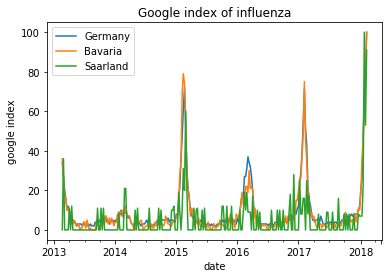

In [121]:
fig = plt.figure()
ax = pf_googleTrends_Germany.plot()
pf_googleTrends_Bavaria.plot(ax = ax)
pf_googleTrends_Saarland.plot(ax = ax)

plt.title('Google index of influenza')
plt.xlabel('date')
plt.ylabel('google index')
ax.legend(['Germany','Bavaria','Saarland'])





## Autocorrelation Germany

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 60)

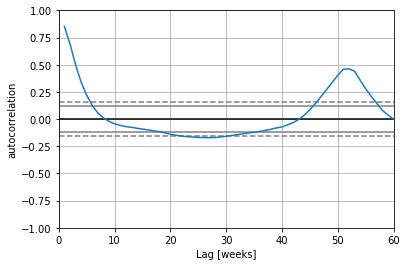

In [122]:
from pandas.tools.plotting import autocorrelation_plot
fig = plt.figure()
autocorrelation_plot(pf_googleTrends_Germany['Influenza'])
plt.xlabel('Lag [weeks]')
plt.ylabel('autocorrelation')
plt.xlim([0,60])

## Cross-correlation of influenza cases reported from European countries with Google trend data

In [ ]:
# get worldwide google Influenza trends 
# get data through the unofficial Google treds API (pytrends)


In [123]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))   #pandas.Series.corr (Pearson correlation coefficient)


timelag=range(-5,10,1)

df_crosscorr_google=pd.DataFrame(index=timelag)
df_crosscorr_google_summary=pd.DataFrame(index=['max', 'shift [w]'])

for column in EUcountries.keys():
    xcov_weekly = [crosscorr(pf_googleTrends_EU['Germany'],pf_googleTrends_EU[column], lag=i) for i in timelag]
    df_crosscorr_google[column] = xcov_weekly
    df_crosscorr_google_summary[column]=[max(xcov_weekly), timelag[xcov_weekly.index(max(xcov_weekly))]]
 

df_crosscorr_google_summary.loc[:,EUcountries.keys()]#['Italy','Austria','UK', 'Switzerland','France', 'Spain', 'Poland', 'Netherlands', 'Sweden']]


Italy  Czech Republic  Lithuania  Luxembourg    France  \
max        0.903299        0.711584   0.336292    0.471791  0.577448   
shift [w]  5.000000        1.000000  -1.000000   -1.000000  4.000000   

           Slovakia   Ireland  Slovenia   Belgium     Spain    ...     \
max        0.650567  0.662949  0.684589  0.573033  0.467392    ...      
shift [w]  0.000000  4.000000  2.000000  1.000000  4.000000    ...      

            Croatia  Bulgaria   Romania   Estonia  Portugal  Austria  \
max        0.389619  0.713815  0.437779  0.461238  0.433467  0.84097   
shift [w]  3.000000  4.000000  0.000000  2.000000  4.000000  2.00000   

                 UK    Greece   Hungary    Cyprus  
max        0.721336  0.433043  0.886232  0.180724  
shift [w]  4.000000  3.000000  1.000000  2.000000  

[2 rows x 26 columns]

/usr/local/lib/python2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


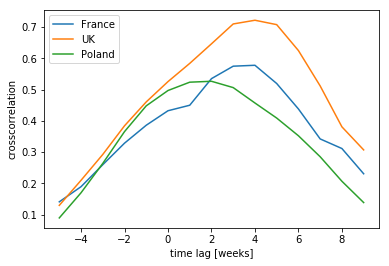

In [124]:
df_crosscorr_google.reset_index().plot(x='index', y=['France', 'UK', 'Poland'])
plt.xlabel('time lag [weeks]')
plt.ylabel('crosscorrelation')
plt.legend()
plt.show()


## Comparison of magnitude between different countries
To use the data from other countries for prediction of the magnitude of the flu wave in Germany there needs to be a clear relationship between the magnitudes of the flu waves (here in terms of google search index) in the different countries.

(2401, 2513)

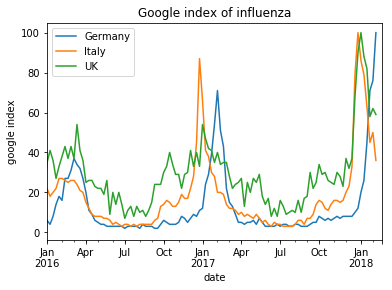

In [125]:
fig = plt.figure()

countries = ['Germany','Italy','UK']#,'France','Poland']

for country in countries:
    ax_google = pf_googleTrends_EU[country].plot()
    pf_googleTrends_EU[country].plot(ax = ax)


plt.title('Google index of influenza')
plt.xlabel('date')
plt.ylabel('google index')
ax_google.legend(countries)
plt.xlim([datetime.date(year=2016,month=1,day=1),datetime.date.today()])





# Heatmaps

Heatmap created following: http://www.alexschultz.co.uk/weblog/2010/07/creating-country-level-heatmaps-in-python.html

In [113]:
os.getcwd()


'/Users/kilianzwirglmaier/Documents/DataIncubator/CapstoneProject/Capstone-FluWavePrediction/AnimatedMap'

In [126]:
from lxml import etree
import os

def show_flu_inEU_for_week_lxml(date): 
    # date is a datetime object
    # soup a beatiful soup object
    currnt_dir = os.getcwd()
    os.chdir(currnt_dir)
    svg = etree.parse('Blank_map_of_Europe_cropped.svg')
    EUcountries = {'Belgium':'BE','Bulgaria':'BG','Czech Republic':'CZ','Denmark':'DK','Estonia':'EE','Ireland':'IE','Greece':'GR','Spain':'ES','France':'FR','Croatia':'HR','Italy':'IT','Cyprus':'CY','Latvia':'LV','Lithuania':'LT','Luxembourg':'LU','Hungary':'HU','Netherlands':'NL','Austria':'AT','Poland':'PL','Portugal':'PT','Romania':'RO','Slovenia':'SI','Slovakia':'SK','Finland':'FI','Sweden':'SE','UK':'GB'}#,'Malta':'MT'}
    map_countryCode = {'lt-3': 'Lithuania', 'gb-gbn-5': 'UK', 'lv-1': 'Latvia', 'fi-5': 'Finland', 'sk-2': 'Slovakia', 'lu-7': 'Luxembourg', 'si-9': 'Slovenia', 'at-3': 'Austria', 'ie-5': 'Ireland', 'dk-9': 'Denmark', 'be-2': 'Belgium', 'gr-7': 'Greece', 'ee-8': 'Estonia', 'es-4': 'Spain', 'cz-1': 'Czech Republic', 'ro-1': 'Romania', 'hu-3': 'Hungary', 'nl-3': 'Netherlands', 'hr-2': 'Croatia', 'it-4': 'Italy', 'cy-6': 'Cyprus', 'fr-7': 'France', 'pt-0': 'Portugal', 'se-7': 'Sweden', 'de-2': 'Germany', 'bg-3': 'Bulgaria', 'pl-1': 'Poland'}#, 'mt-0': 'Malta'}
#    map_countryCode = {'lt': 'Lithuania', 'gb': 'UK', 'lv': 'Latvia', 'fi': 'Finland', 'sk': 'Slovakia', 'lu': 'Luxembourg', 'si': 'Slovenia', 'at': 'Austria', 'ie': 'Ireland', 'dk': 'Denmark', 'be': 'Belgium', 'gr': 'Greece', 'va': 'Vatican', 'ee': 'Estonia', 'es': 'Spain', 'cz': 'Czech Republic', 'ro': 'Romania', 'mt': 'Malta', 'hu': 'Hungary', 'nl': 'Netherlands', 'hr': 'Croatia', 'it': 'Italy', 'cy': 'Cyprus', 'fr': 'France', 'pt': 'Portugal', 'se': 'Sweden', 'de': 'Germany', 'bg': 'Bulgaria', 'pl': 'Poland'}
    
    path_style ="stroke:#ffffff;stroke-width:0.40082097;stroke-miterlimit:4;stroke-dasharray:none;fill:" 
    #path_style = "fill-opacity:1;stroke:#ffffff;stroke-width:0.5225144" 
    colormap = ["#c0c0c0","#ffeda0","#feb24c","#f03b20"]

    pf_of_date = pf_googleTrends_EU.ix[date]
    root = svg.getroot()
    child_element = root.find('{http://www.w3.org/2000/svg}g')
    # countries with multiple polygons
    gs = child_element.findall('{http://www.w3.org/2000/svg}g')
    
    # countries without multiple polygons
    paths = child_element.findall('{http://www.w3.org/2000/svg}path')
    
    for p in paths:
        p_id = p.get('id')
        
        if p_id in map_countryCode.keys():
            if pf_of_date[map_countryCode[p_id]] > 50:
                color_class = 3
            elif pf_of_date[map_countryCode[p_id]] > 10:
                color_class = 2               
            elif pf_of_date[map_countryCode[p_id]] > 1:
                color_class = 1                  
            else:
                color_class = 0
              
            color = colormap[color_class]
            p.set('style', path_style + color)
            
            
            
    for g in gs:
        g_id = g.get('id')
        if g_id in map_countryCode.keys():        
            if pf_of_date[map_countryCode[g_id]] > 50:
                color_class = 3
            elif pf_of_date[map_countryCode[g_id]] > 10:
                color_class = 2
            elif pf_of_date[map_countryCode[g_id]] > 1:
                color_class = 1
            else:
                color_class = 0
            color = colormap[color_class]  
            
            for t in g.findall('{http://www.w3.org/2000/svg}path'):
                t.set('style',path_style+color)
            for g_3rdlevel in g.findall('{http://www.w3.org/2000/svg}g'):
                for t2 in g_3rdlevel.findall('{http://www.w3.org/2000/svg}path'):
                    t.set('style',path_style+color)
                
    # write everything to a file
    f = svg.write('EU_flu_'+ date.strftime('%Y_%m_%d')+'.svg',pretty_print = True)            
                        
        

In [131]:
startdate = datetime.datetime.strptime('2017-07-30','%Y-%m-%d')
time_steps = 12
time_delta = 14 #days

for i in xrange(0,time_steps):
    date = startdate + timedelta(days= i*time_delta)
    show_flu_inEU_for_week_lxml(date)
